In [4]:
import pickle
import tempfile
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

for data in ['ha','so','sw','yo']:
# for data in ['ha']:
    # 利用pickle打开保存成文件的排序后的数据
    with open(f'./run_retrieval/{data}-e2e-dev.pkl', 'rb') as f:
        retrieval_results = pickle.load(f)

    # 利用pickle打开保存成文件的排序后的数据
    with open(f'./run_reranking-3.5-turbo/{data}-e2e-dev.pkl', 'rb') as f:
        reranking_results1 = pickle.load(f)

    # 利用pickle打开保存成文件的排序后的数据
    with open(f'./run_reranking-4o-mini/{data}-e2e-dev.pkl', 'rb') as f:
        reranking_results2 = pickle.load(f)

    # # 利用pickle打开保存成文件的排序后的数据
    # with open(f'./run_reranking-4/{data}-e2e-dev.pkl', 'rb') as f:
    #     reranking_results3 = pickle.load(f)

    # 利用pickle打开保存成文件的排序后的数据
    with open(f'./run_reranking-o1-mini/{data}-e2e-dev.pkl', 'rb') as f:
        reranking_results4 = pickle.load(f)

    # 利用pickle打开保存成文件的排序后的数据
    with open(f'./run_reranking-claude-3-5-sonnet-20240620/{data}-e2e-dev.pkl', 'rb') as f:
        reranking_results5 = pickle.load(f)

    data = data + '-dev'
    for results in [retrieval_results, reranking_results1, reranking_results2, reranking_results4, reranking_results5]:
        print(data)
        # 评估nDCG@10，即在前10个结果中的归一化折损累积增益
        from trec_eval import EvalFunction  # 导入评估函数模块

        # 创建一个临时文件来存储评估结果
        temp_file = tempfile.NamedTemporaryFile(delete=False).name
        # 将新的检索结果写入临时文件
        EvalFunction.write_file(results, temp_file)
        # 使用TREC评估工具执行评估，传入查询主题文件和结果文件
        EvalFunction.main(data, temp_file)

ha-dev
write_file
{'NDCG@1': 0.0, 'NDCG@5': 0.08304, 'NDCG@10': 0.09921, 'NDCG@20': 0.14542, 'MAP@1': 0.0, 'MAP@5': 0.02819, 'MAP@10': 0.0461, 'MAP@20': 0.06951, 'Recall@1': 0.0, 'Recall@5': 0.05, 'Recall@10': 0.11417, 'Recall@20': 0.21917}
mrr@100:0.1340423362327387
ha-dev
write_file
{'NDCG@1': 0.1, 'NDCG@5': 0.13836, 'NDCG@10': 0.13877, 'NDCG@20': 0.19675, 'MAP@1': 0.01667, 'MAP@5': 0.06264, 'MAP@10': 0.08123, 'MAP@20': 0.11009, 'Recall@1': 0.01667, 'Recall@5': 0.09, 'Recall@10': 0.125, 'Recall@20': 0.2575}
mrr@100:0.23905122655122651
ha-dev
write_file
{'NDCG@1': 0.1, 'NDCG@5': 0.19388, 'NDCG@10': 0.19654, 'NDCG@20': 0.22733, 'MAP@1': 0.02, 'MAP@5': 0.09764, 'MAP@10': 0.11867, 'MAP@20': 0.14173, 'Recall@1': 0.02, 'Recall@5': 0.155, 'Recall@10': 0.19, 'Recall@20': 0.25583}
mrr@100:0.307399910031489
ha-dev
write_file
{'NDCG@1': 0.1, 'NDCG@5': 0.1922, 'NDCG@10': 0.20744, 'NDCG@20': 0.23271, 'MAP@1': 0.01667, 'MAP@5': 0.09326, 'MAP@10': 0.11529, 'MAP@20': 0.14119, 'Recall@1': 0.01667, 'R

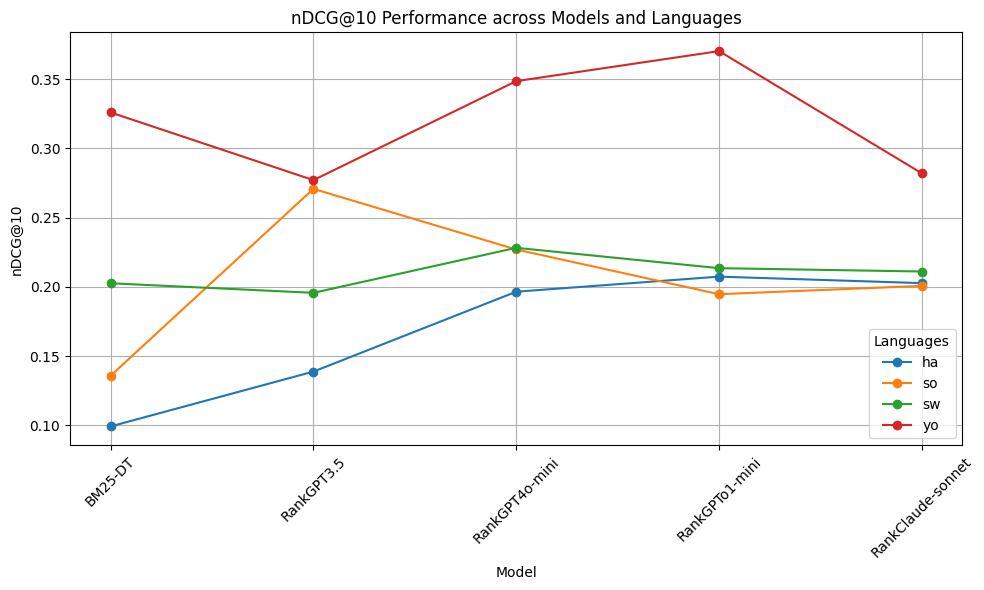

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 数据从表格中提取
data = {
    "Model": ["BM25-DT", "RankGPT3.5", "RankGPT4o-mini", "RankGPTo1-mini", "RankClaude-sonnet"],
    "ha": [0.0992, 0.1388, 0.1965, 0.2074, 0.2027],
    "so": [0.1358, 0.2708, 0.2270, 0.1947, 0.2007],
    "sw": [0.2026, 0.1957, 0.2282, 0.2135, 0.2111],
    "yo": [0.3260, 0.2771, 0.3486, 0.3703, 0.2820]
}

df = pd.DataFrame(data)

# 绘制nDCG@10的折线图
plt.figure(figsize=(10, 6))

for lang in ["ha", "so", "sw", "yo"]:
    plt.plot(df["Model"], df[lang], marker='o', label=lang)

plt.title("nDCG@10 Performance across Models and Languages")
plt.xlabel("Model")
plt.ylabel("nDCG@10")
plt.legend(title="Languages")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 显示图表
plt.show()

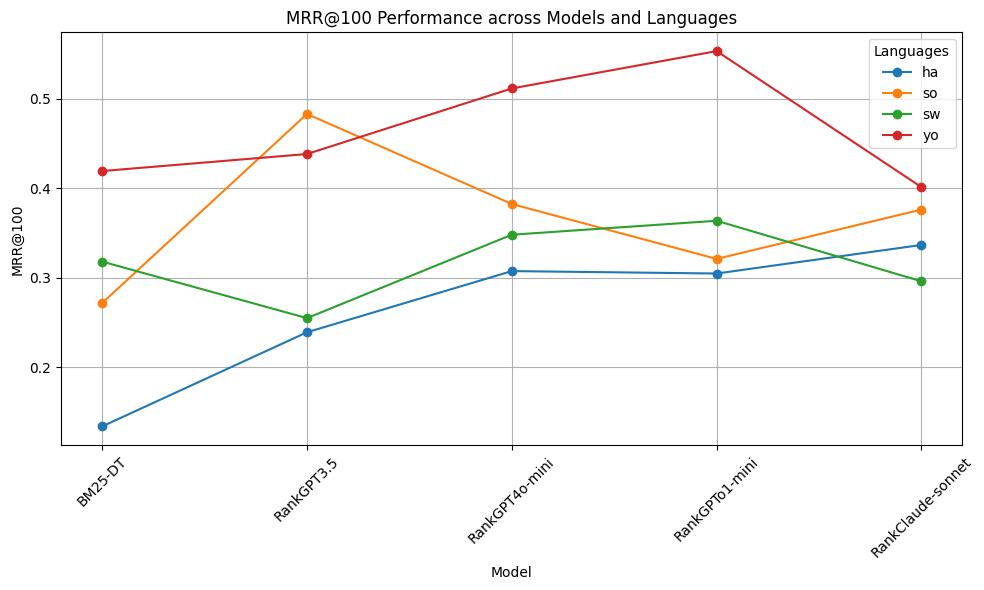

In [3]:
# MRR@100 数据提取
data_mrr = {
    "Model": ["BM25-DT", "RankGPT3.5", "RankGPT4o-mini", "RankGPTo1-mini", "RankClaude-sonnet"],
    "ha": [0.1340, 0.2391, 0.3074, 0.3047, 0.3366],
    "so": [0.2717, 0.4828, 0.3823, 0.3210, 0.3761],
    "sw": [0.3180, 0.2549, 0.3480, 0.3636, 0.2960],
    "yo": [0.4191, 0.4381, 0.5113, 0.5530, 0.4011]
}

df_mrr = pd.DataFrame(data_mrr)

# 绘制MRR@100的折线图
plt.figure(figsize=(10, 6))

for lang in ["ha", "so", "sw", "yo"]:
    plt.plot(df_mrr["Model"], df_mrr[lang], marker='o', label=lang)

plt.title("MRR@100 Performance across Models and Languages")
plt.xlabel("Model")
plt.ylabel("MRR@100")
plt.legend(title="Languages")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 显示图表
plt.show()